In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [19]:
# Load Train Dataset
Train_fraud_provider=pd.read_csv("./data/healthcare_fraud_detection/Train-1542865627584.csv")
Train_Bene=pd.read_csv("./data/healthcare_fraud_detection/Train_Beneficiarydata-1542865627584.csv")
Train_Inpat=pd.read_csv("./data/healthcare_fraud_detection/Train_Inpatientdata-1542865627584.csv")
Train_Outpat=pd.read_csv("./data/healthcare_fraud_detection/Train_Outpatientdata-1542865627584.csv")

In [20]:
# Load Test Dataset
Test_fraud_provider=pd.read_csv("./data/healthcare_fraud_detection/Test-1542969243754.csv")
Test_Bene=pd.read_csv("./data/healthcare_fraud_detection/Test_Beneficiarydata-1542969243754.csv")
Test_Inpat=pd.read_csv("./data/healthcare_fraud_detection/Test_Inpatientdata-1542969243754.csv")
Test_Outpat=pd.read_csv("./data/healthcare_fraud_detection/Test_Outpatientdata-1542969243754.csv")

In [21]:
Train_Inpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [22]:
Train_Outpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [23]:
#Train_Inpat[ ~Train_Inpat.BeneID.isin(Train_Outpat.BeneID.unique())]
#Train_allPatients = Train_Inpat.append(Train_Outpat, sort=False)

In [24]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

Train_Bene = Train_Bene.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Bene = Train_Bene.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Bene = Test_Bene.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Bene = Test_Bene.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [25]:
## Lets Create Age column to the dataset
Train_Bene['DOB'] = pd.to_datetime(Train_Bene['DOB'] , format = '%Y-%m-%d')
Train_Bene['DOD'] = pd.to_datetime(Train_Bene['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Bene['Age'] = round(((Train_Bene['DOD'] - Train_Bene['DOB']).dt.days)/365)
Train_Bene.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Bene['DOB']).dt.days)/365),
                                inplace=True)

Test_Bene['DOB'] = pd.to_datetime(Test_Bene['DOB'] , format = '%Y-%m-%d')
Test_Bene['DOD'] = pd.to_datetime(Test_Bene['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Bene['Age'] = round(((Test_Bene['DOD'] - Test_Bene['DOB']).dt.days)/365)
Test_Bene.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Bene['DOB']).dt.days)/365),
                                 inplace=True)

In [26]:
#Lets create a new variable 'WhetherDead' with flag 1 means Dead and 0 means not Dead
Train_Bene.loc[Train_Bene.DOD.isna(),'WhetherDead']=0
Train_Bene.loc[Train_Bene.DOD.notna(),'WhetherDead']=1
Test_Bene.loc[Test_Bene.DOD.isna(),'WhetherDead']=0
Test_Bene.loc[Test_Bene.DOD.notna(),'WhetherDead']=1

In [27]:
Train_Inpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [28]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 
Train_Inpat['AdmissionDt'] = pd.to_datetime(Train_Inpat['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpat['DischargeDt'] = pd.to_datetime(Train_Inpat['DischargeDt'],format = '%Y-%m-%d')
Train_Inpat['AdmitForDays'] = ((Train_Inpat['DischargeDt'] - Train_Inpat['AdmissionDt']).dt.days)+1
Train_Inpat['Inpatient'] = 1
Train_Inpat.drop(['AdmissionDt', 'DischargeDt'],axis=1, inplace=True)

Test_Inpat['AdmissionDt'] = pd.to_datetime(Test_Inpat['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpat['DischargeDt'] = pd.to_datetime(Test_Inpat['DischargeDt'],format = '%Y-%m-%d')
Test_Inpat['AdmitForDays'] = ((Test_Inpat['DischargeDt'] - Test_Inpat['AdmissionDt']).dt.days)+1
Test_Inpat['Inpatient'] = 1
Test_Inpat.drop(['AdmissionDt', 'DischargeDt'],axis=1, inplace=True)

In [29]:
Train_allPatients = Train_Inpat.append(Train_Outpat, sort=False)
Test_allPatients = Test_Inpat.append(Test_Outpat, sort=False)

In [31]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_allPatientsDetails=pd.merge(Train_allPatients,Train_Bene,left_on='BeneID',right_on='BeneID',how='inner')
Test_allPatientsDetails=pd.merge(Test_allPatients,Test_Bene,left_on='BeneID',right_on='BeneID',how='inner')

In [32]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join
Train_ProviderWithPatientDetails=pd.merge(Train_fraud_provider,Train_allPatientsDetails,on='Provider')

Test_ProviderWithPatientDetails=pd.merge(Test_fraud_provider,Test_allPatientsDetails,on='Provider')

In [33]:
Normal_Claims = Train_ProviderWithPatientDetails[Train_ProviderWithPatientDetails.PotentialFraud == 'No']
Fraud_Claims = Train_ProviderWithPatientDetails[Train_ProviderWithPatientDetails.PotentialFraud == 'Yes']

In [34]:
Fraud_Claims.shape

(212796, 57)

In [35]:
Normal_Claims.shape

(345415, 57)

In [36]:
Train_fraud_provider.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [37]:
All_Claims = Train_ProviderWithPatientDetails

In [38]:
mean_calc_cols = ['InscClaimAmtReimbursed','DeductibleAmtPaid','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                  'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','AdmitForDays']
group_cols =['Provider','BeneID','OtherPhysician','OperatingPhysician','AttendingPhysician','ClmAdmitDiagnosisCode',
        'DiagnosisGroupCode','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']
for grp in group_cols:
    for mean_col in mean_calc_cols:
        new_col = "per"+grp+"Avg_"+mean_col
        #print(new_col)
        All_Claims[new_col]=All_Claims.groupby(grp)[mean_col].transform('mean')
       

In [41]:
All_Claims["PerProviderAvg_Age"]=Normal_Claims.groupby('Provider')['Age'].transform('mean')
All_Claims["PerProviderAvg_NoOfMonths_PartACov"]=Normal_Claims.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
All_Claims["PerProviderAvg_NoOfMonths_PartBCov"]=Normal_Claims.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')


**Claims are filed by Provider,so fraud can be organized crime.So we will check ClmCounts filed by Providers and when pairs like Provider +BeneID, Provider+Attending Physician, Provider+ClmAdmitDiagnosisCode, Provider+ClmProcedureCode_1,Provider+ClmDiagnosisCode_1 are together.**


**Average Feature based on grouping based on combinations of different variables.**

In [42]:
cnt_grp_cols_list= [['Provider'],['Provider','BeneID'],['Provider','AttendingPhysician']
        ,['Provider','OtherPhysician'],['Provider','OperatingPhysician'],['Provider','ClmAdmitDiagnosisCode']
        ,['Provider','ClmProcedureCode_1'],['Provider','ClmProcedureCode_2'],['Provider','ClmProcedureCode_3']
        ,['Provider','ClmProcedureCode_4'],['Provider','ClmProcedureCode_5']
        ,['Provider','ClmDiagnosisCode_1'],['Provider','ClmDiagnosisCode_2'],['Provider','ClmDiagnosisCode_3']
        ,['Provider','ClmDiagnosisCode_4'],['Provider','ClmDiagnosisCode_5'],['Provider','ClmDiagnosisCode_6']
        ,['Provider','ClmDiagnosisCode_7'],['Provider','ClmDiagnosisCode_8'],['Provider','ClmDiagnosisCode_9']
        ,['Provider','DiagnosisGroupCode']
        ,['Provider','BeneID','AttendingPhysician'],['Provider','BeneID','OtherPhysician']
        ,['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1']
        ,['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1']
        ,['Provider','BeneID','OperatingPhysician'],['Provider','BeneID','ClmProcedureCode_1']
        ,['Provider','BeneID','ClmDiagnosisCode_1']
        ,['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1']]


for grp_list in cnt_grp_cols_list:
    grp_name ="Claims_by_"
    for grp_item in grp_list:
        grp_name = grp_name+grp_item
    new_col = grp_name+"_Cnt"
    #print(new_col)
    All_Claims[new_col]=All_Claims.groupby(grp_list)['ClaimID'].transform('count')


In [43]:
## Lets Check Shape after creating new features.
print('All_Claims shape-',All_Claims.shape)

All_Claims shape- (558211, 250)


In [44]:
Normal_Claims['ClmDiagnosisCode_1'].value_counts()
vc = Normal_Claims.ClmDiagnosisCode_1.value_counts()

In [45]:
vc[vc>500]

4019     8823
4011     7963
2724     2262
2720     2070
2721     1925
         ... 
V568      602
V4512     601
V4511     594
7925      586
V5631     575
Name: ClmDiagnosisCode_1, Length: 63, dtype: int64

In [46]:
## Lets Check unique values of ICD Diagnosis Codes
diagnosiscode_2chars=Normal_Claims['ClmDiagnosisCode_1'].astype(str).str[0:2]
diagnosiscode_2chars.unique()

array(['78', '29', '03', '56', '42', '41', '35', '85', '51', '59', 'V4',
       'na', '71', 'V1', '27', 'V7', '24', '79', '04', '40', 'V5', '28',
       '47', '72', '53', '46', '49', '15', '17', '25', '99', '58', 'V0',
       '18', '34', '73', 'V6', '62', 'V8', '11', '61', '36', '68', '43',
       '83', '44', 'E8', '02', '55', '32', '33', '91', '23', '57', '38',
       '70', '21', '05', '13', '00', '74', '88', '19', '60', '20', '16',
       '82', '30', '14', '92', '84', '52', '45', '37', '07', '81', 'V2',
       '95', '87', '80', '69', '98', '90', '39', '08', '93', '31', '22',
       '97', '26', '48', '64', '66', '75', 'E9', '09', '50', '89', '12',
       '96', '06', '10', '77', '54', '86', '94', '65', '67', '76', '63',
       '01'], dtype=object)

In [47]:
x=diagnosiscode_2chars.sort_values(ascending=True)

In [48]:
x.unique()
#x.value_counts()[:10]

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98',
       '99', 'E8', 'E9', 'V0', 'V1', 'V2', 'V4', 'V5', 'V6', 'V7', 'V8',
       'na'], dtype=object)

**Above Data Shows that if we take only first 2 characters of diagnosis code for the purpose of grouping them ,we might end up creating large sparse matrix ,as each 'code' column will generate 120+ dummy columns.This will increase computational time and loose explicability.**

**Data Preprocessing**

**Impute Numeric columns with 0's.**

In [49]:
##### Lets impute numeric columns with 0

cols1 = All_Claims.select_dtypes([np.number]).columns
cols2 = All_Claims.select_dtypes(exclude = [np.number]).columns

All_Claims[cols1] = All_Claims[cols1].fillna(value=0)

**Feature Selection**

In [50]:
# Lets remove unnecessary columns ,as we grouped based on these columns and derived maximum infromation from them.

cols=All_Claims.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_category_removed=All_Claims.drop(axis=1,columns=remove_these_columns)


In [51]:
## Lets Check shape and missing values
print('Train Shape :',Train_category_removed.shape)
print("Train Missing Values",Train_category_removed.isnull().sum().sum())

Train Shape : (558211, 221)
Train Missing Values 0


**Type Conversion**

In [52]:
## Lets Convert types of gender and race to categorical.
Train_category_removed.Gender=Train_category_removed.Gender.astype('category')
Train_category_removed.Race=Train_category_removed.Race.astype('category')

**Dummification**

In [53]:
# Lets create dummies for categorrical columns.
Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender','Race'],drop_first=True)

**Convert Target values to 1 and 0,wher '1' means Yes and '0' means No**

In [54]:
Train_category_removed.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_category_removed.head()
Train_category_removed.PotentialFraud=Train_category_removed.PotentialFraud.astype('int64')
Train_category_removed.PotentialFraud.dtypes
Train_category_removed.PotentialFraud.min()

0

In [55]:
Train_category_removed.PotentialFraud.max()

1

**Select only Test related data from merged data**

**Data Aggregation to the Providers level**

In [56]:
### Lets aggregate claims data to unique providers.
Train_category_removed_groupedbyProv_PF=Train_category_removed.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [57]:
print('Providers in Train:' ,Train_category_removed_groupedbyProv_PF.shape)

Providers in Train: (5410, 222)


In [58]:
Train_category_removed_groupedbyProv_PF.head(3)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,Inpatient,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Claims_by_ProviderBeneIDAttendingPhysicianClmProcedureCode_1_Cnt,Claims_by_ProviderBeneIDAttendingPhysicianClmDiagnosisCode_1_Cnt,Claims_by_ProviderBeneIDOperatingPhysician_Cnt,Claims_by_ProviderBeneIDClmProcedureCode_1_Cnt,Claims_by_ProviderBeneIDClmDiagnosisCode_1_Cnt,Claims_by_ProviderBeneIDClmDiagnosisCode_1ClmProcedureCode_1_Cnt,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,5.0,300,300,15,19,...,2.0,24.0,5.0,2.0,24.0,2.0,16.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,382.0,62.0,1560,1567,56,80,...,39.0,132.0,45.0,39.0,132.0,39.0,78.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,0.0,1768,1782,64,88,...,0.0,143.0,27.0,0.0,143.0,0.0,103.0,24.0,5.0,0.0


**Train Validation split**

In [59]:
print('Train shape:',Train_category_removed_groupedbyProv_PF.shape)

Train shape: (5410, 222)


In [60]:
Train_category_removed_groupedbyProv_PF.head(3)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,Inpatient,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Claims_by_ProviderBeneIDAttendingPhysicianClmProcedureCode_1_Cnt,Claims_by_ProviderBeneIDAttendingPhysicianClmDiagnosisCode_1_Cnt,Claims_by_ProviderBeneIDOperatingPhysician_Cnt,Claims_by_ProviderBeneIDClmProcedureCode_1_Cnt,Claims_by_ProviderBeneIDClmDiagnosisCode_1_Cnt,Claims_by_ProviderBeneIDClmDiagnosisCode_1ClmProcedureCode_1_Cnt,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,5.0,300,300,15,19,...,2.0,24.0,5.0,2.0,24.0,2.0,16.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,382.0,62.0,1560,1567,56,80,...,39.0,132.0,45.0,39.0,132.0,39.0,78.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,0.0,1768,1782,64,88,...,0.0,143.0,27.0,0.0,143.0,0.0,103.0,24.0,5.0,0.0


## H2O Implemetation

In [61]:
    import h2o
    from IPython import get_ipython
    import jupyter
    import matplotlib.pyplot as plt
    from pylab import rcParams

    import os
    from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

    h2o.init(max_mem_size = 2) # initializing h2o server
    h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/ramesh/opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2w/cxdktjs13vb8mn_8m4b7bfbr0000gp/T/tmpfhvvcnzi
  JVM stdout: /var/folders/2w/cxdktjs13vb8mn_8m4b7bfbr0000gp/T/tmpfhvvcnzi/h2o_ramesh_started_from_python.out
  JVM stderr: /var/folders/2w/cxdktjs13vb8mn_8m4b7bfbr0000gp/T/tmpfhvvcnzi/h2o_ramesh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_ramesh_209al2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [62]:
claims_data_by_provider=Train_category_removed_groupedbyProv_PF.drop(axis=1,columns=['Provider'])

In [63]:
# Turns python pandas frame into an H2OFrame
Provider_Data_h2o  = h2o.H2OFrame(claims_data_by_provider)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [64]:
# 80% for the training set and 20% for the testing set
train, test = Provider_Data_h2o.split_frame([0.8])
print(train.shape)
print(test.shape)

(4333, 221)
(1077, 221)


In [65]:
train_df = train.as_data_frame()
test_df = test.as_data_frame()
train_df = train_df[train_df['PotentialFraud'] == 0]
train_df = train_df.drop(['PotentialFraud'], axis=1)
Y_test_df = test_df['PotentialFraud']
test_df = test_df.drop(['PotentialFraud'], axis=1)
train_df.shape

(3917, 220)

In [66]:
train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
    anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                                   hidden = [30,10,10,30],
                                   epochs = 100,
                                   standardize = True,
                                    stopping_metric = 'MSE', # MSE for autoencoders
                                    loss = 'automatic',
                                    train_samples_per_iteration = 32,
                                    shuffle_training_data = True,     
                                   autoencoder = True,
                                   l1 = 10e-5)
    anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [68]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,perClmProcedureCode_2Avg_OPAnnualDeductibleAmt,1.000000,1.000000,0.015833
1,perClmProcedureCode_3Avg_DeductibleAmtPaid,0.900288,0.900288,0.014254
2,perClmDiagnosisCode_10Avg_AdmitForDays,0.890308,0.890308,0.014096
3,perClmDiagnosisCode_10Avg_IPAnnualDeductibleAmt,0.886538,0.886538,0.014037
4,perClmDiagnosisCode_10Avg_DeductibleAmtPaid,0.881450,0.881450,0.013956
...,...,...,...,...
208,perClmProcedureCode_5Avg_AdmitForDays,0.001140,0.001140,0.000018
209,Claims_by_ProviderClmProcedureCode_5_Cnt,0.001137,0.001137,0.000018
210,perClmProcedureCode_5Avg_InscClaimAmtReimbursed,0.001033,0.001033,0.000016
211,perClmProcedureCode_5Avg_DeductibleAmtPaid,0.001022,0.001022,0.000016


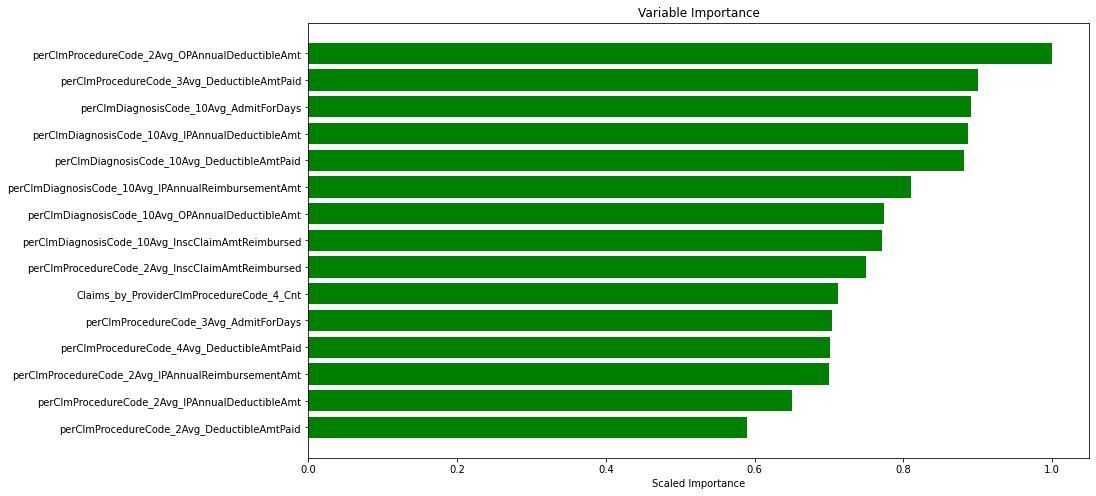

In [69]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

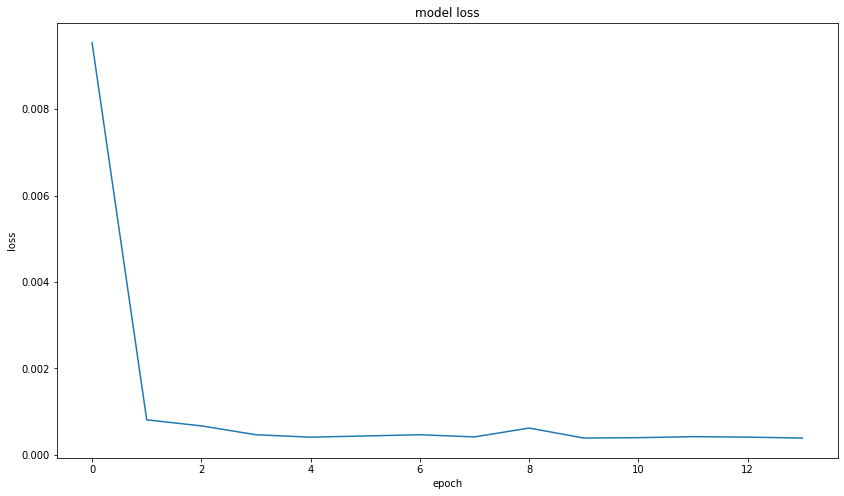

In [70]:
# plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
#plt.plot(scoring_history['validation_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

**Evaluating the Testing set**

Testing set has both normal and fraud transactions in it. From this training method, The model will learn to identify the pattern of the input data. If an anomalous test point does not match the learned pattern, the autoencoder will likely have a high error rate in reconstructing this data, indicating anomalous data. So that we can identify the anomalies of the data. To calculate the error, it uses Mean Squared Error(MSE)

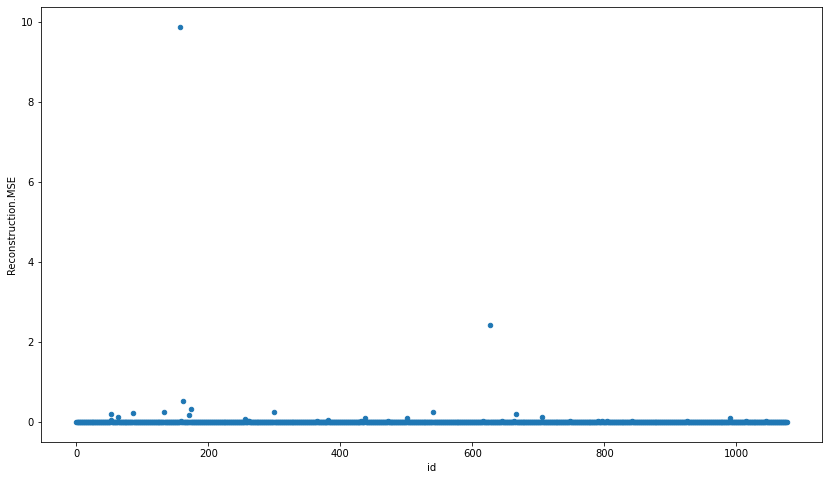

In [71]:
test_rec_error = anomaly_model.anomaly(test_h2o) 
# anomaly is a H2O function which calculates the error for the dataset
test_rec_error_df = test_rec_error.as_data_frame() # converting to pandas dataframe

# plotting the testing dataset against the error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [72]:
# predicting the class for the testing dataset
predictions = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,1077.000000,1077.000000
mean,0.015079,0.083565
std,0.310764,0.276864
min,0.000011,0.000000
25%,0.000022,0.000000
50%,0.000083,0.000000
75%,0.000328,0.000000
max,9.872896,1.000000


## ROC Curve

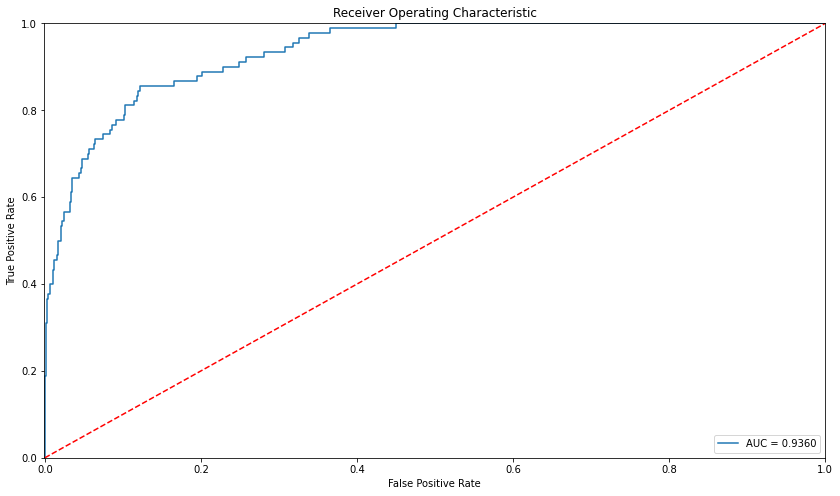

In [73]:
    from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                                 roc_curve, recall_score, classification_report, f1_score,
                                 precision_recall_fscore_support)
    fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show();

### Precision and Recall
Since the data is highly unbalanced, it cannot be measured only by using accuracy.
Precision vs Recall was chosen as the matrix for the classification task.

**Precision**: Measuring the relevancy of obtained results. 
[ True positives / (True positives + False positives)]

**Recall**: Measuring how many relevant results are returned.
[ True positives / (True positives + False negatives)]

**True Positives** - Number of actual frauds predicted as frauds

**False Positives** - Number of non-frauds predicted as frauds

**False Negatives** - Number of frauds predicted as non-frauds.

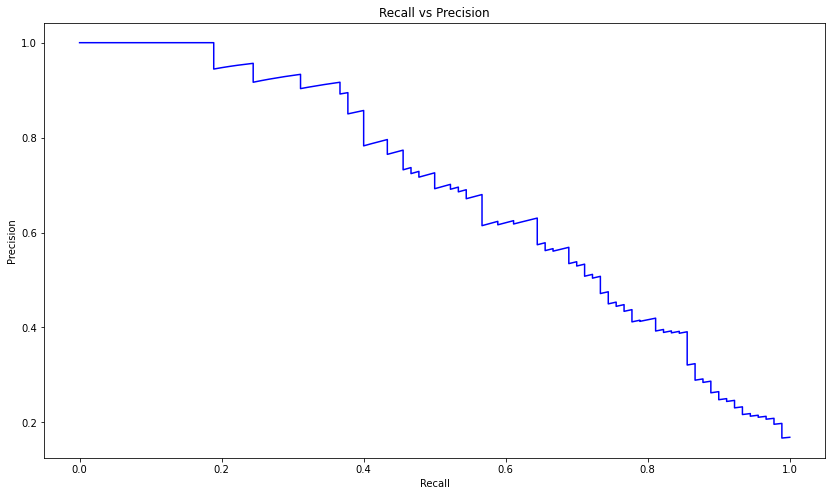

In [74]:
    precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
    plt.plot(recall, precision, 'b', label='Precision-Recall curve')
    plt.title('Recall vs Precision')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

We need to find a better threshold that can seperate the anomalies from normals. This can be done by getting the intersection of the **Precision/Recall vs Threshold** graph

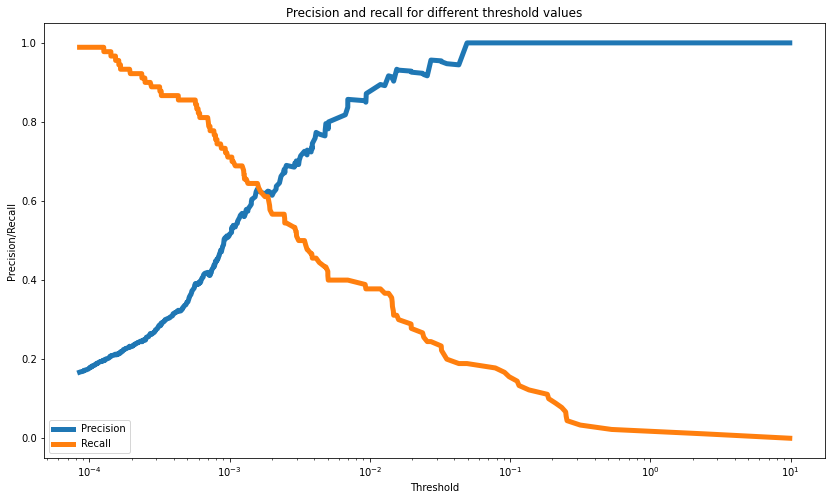

In [75]:
    plt.plot(th, precision[1:], label="Precision",linewidth=5)
    plt.plot(th, recall[1:], label="Recall",linewidth=5)
    plt.title('Precision and recall for different threshold values')
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.xscale('log')
    plt.legend()
    plt.show()

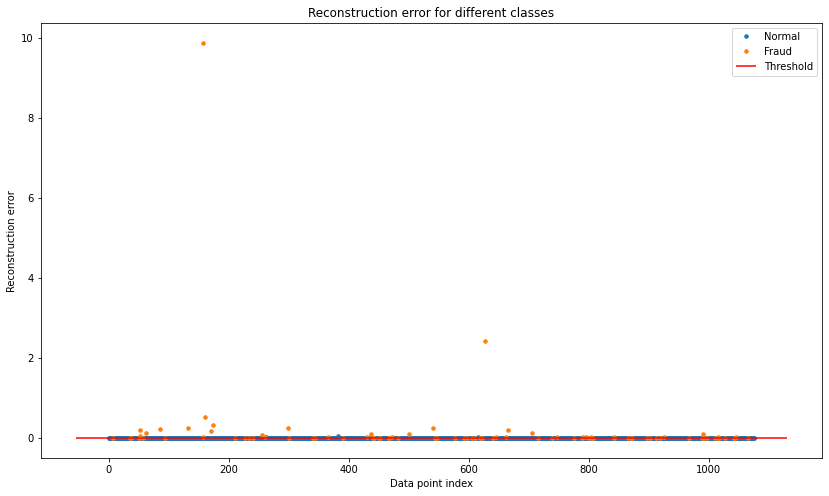

In [76]:
    # plot the testing set with the threshold
    threshold = 0.01
    groups = error_df.groupby('true_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
                label= "Fraud" if name == 1 else "Normal")
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
    ax.legend()
    plt.title("Reconstruction error for different classes")
    plt.ylabel("Reconstruction error")
    plt.xlabel("Data point index")
    plt.show();

## Confusion Matrix

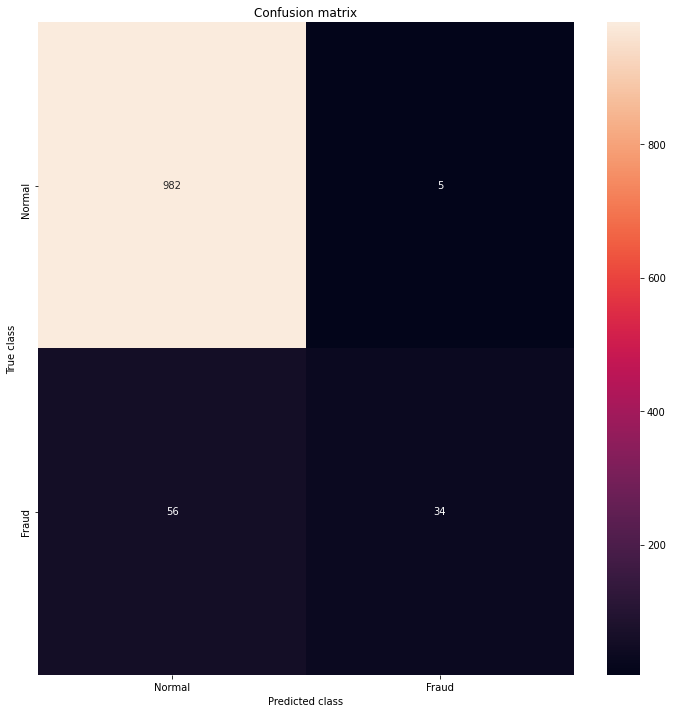

In [77]:
    import seaborn as sns
    LABELS = ['Normal', 'Fraud']
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

## Classification Report

In [78]:
csr = classification_report(error_df.true_class, y_pred)
print(csr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       987
           1       0.87      0.38      0.53        90

    accuracy                           0.94      1077
   macro avg       0.91      0.69      0.75      1077
weighted avg       0.94      0.94      0.93      1077

